## Initialization

In [8]:
import os
import cv2
import time

from matplotlib import pyplot as plt
from brodmann17_face_detector import Detector

plt.rcParams['figure.figsize'] = [16, 8]

## Comparing Brodmann with OpenCV

In [9]:
im = cv2.imread("../example/example3.jpg")

In [10]:
#Brodmann face detection
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
with Detector() as det:
    t1 = time.time()
    detections = det.detect(gray)
    brodmann_time = time.time() - t1

In [11]:
#OpenCV face detection
faceCascade = cv2.CascadeClassifier(
    os.path.expanduser("~/.local/lib/python2.7/site-packages/cv2/data/haarcascade_frontalface_default.xml"))
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
t1 = time.time()
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
)
cv_time = time.time() - t1

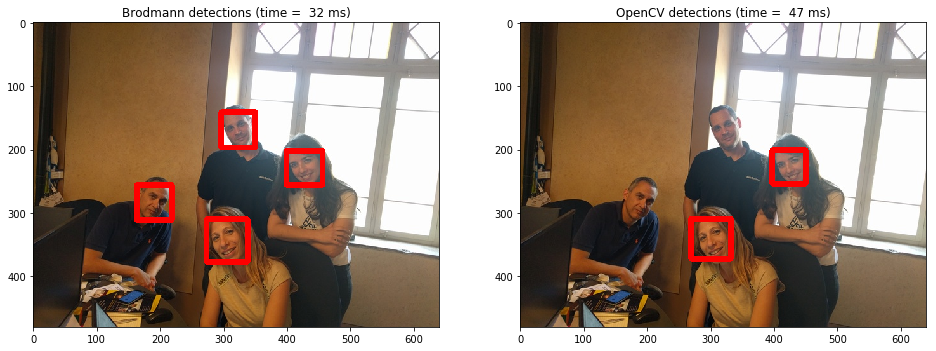

In [12]:
#Plot Brodmann detections
im2show = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
for d in detections:
    im2show = cv2.rectangle(im2show, tuple(d[:2]), tuple(d[:2] + d[2:4]), (255,0,0), 8)

#Plot OpenCV detections
im2show_cv = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
for d in faces:
    im2show_cv = cv2.rectangle(im2show_cv, tuple(d[:2]), tuple(d[:2] + d[2:4]), (255,0,0), 8)


plt.subplot(1, 2, 1)
plt.imshow(im2show)
plt.title('Brodmann detections (time =%4d ms)' % (brodmann_time * 1000, ))

plt.subplot(1, 2, 2)
plt.imshow(im2show_cv)
plt.title('OpenCV detections (time =%4d ms)' % (cv_time * 1000, ))

plt.show()

## Manual memory managment

In [13]:
#Explicit instantization
det = Detector()

detections = det.detect(im) #The detector can work with OpenCV BGR or gray images
#Take care to explicit release when use this way!
det.release()

## Rotation example

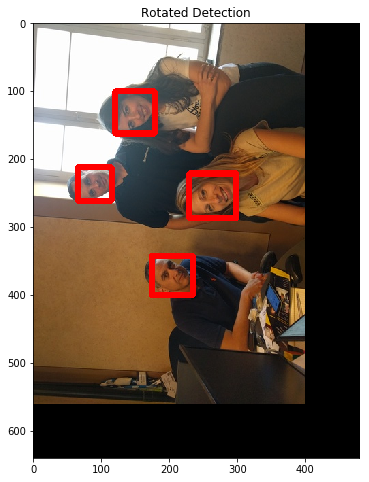

In [14]:
#Explicit instantization
det = Detector()

#Rotate model
det.rotate(270)
[h,w] = im.shape[:2]
center = (h /2. ,w /2.)
M = cv2.getRotationMatrix2D(center, 90, 1.)
rotated90 = cv2.warpAffine(im, M, (h, w))
 
detections = det.detect(rotated90) #The detector can work with OpenCV BGR or gray images

#Plot OpenCV detections
im2show = cv2.cvtColor(rotated90, cv2.COLOR_BGR2RGB)
for d in detections:
    im2show = cv2.rectangle(im2show, tuple(d[:2]), tuple(d[:2] + d[2:4]), (255,0,0), 8)


plt.imshow(im2show)
plt.title('Rotated Detection')
#Take care to explicit release when use this way!
det.release()